### Librerías a utilizar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

#Welch
from scipy import signal
from scipy.interpolate import interp1d
import numpy as np

#### 75dg

In [2]:
#Directorio a recorrer
path_mat = '/home/bryan/Escritorio/Ayudantías 2021/040619_Afternoon/'

def Ficheros(path, formato):
    contenido = os.listdir(path)

    #Acumulador del nombre de las   imagenes a utilizar
    archivos = []

    #Se recorre el path para obtener los nombre y se los aggrega al acumulador, en este caso la lista
    for fichero in contenido:
        if os.path.isfile(os.path.join(path, fichero)) and fichero.endswith(formato):
            archivos.append(fichero)
            
    return archivos


#Verificar si obtiene los archivos
Archivos = Ficheros(path_mat, '.csv')

dstream = []
ustream = []

for archivo in Archivos:
    if 'downstream' in archivo:
        dstream.append(archivo)
    elif 'upstream' in archivo:
        ustream.append(archivo)

In [3]:
dstream.sort()
ustream.sort()

In [4]:
dstream, ustream

(['Bent_cylinder_L100_downstream75deg_wind_speeds.csv',
  'Bent_cylinder_L100_downstream75deg_y0.csv',
  'Bent_cylinder_L100_downstream75deg_y1.csv',
  'Bent_cylinder_L100_downstream75deg_y10.csv',
  'Bent_cylinder_L100_downstream75deg_y2.csv',
  'Bent_cylinder_L100_downstream75deg_y3.csv',
  'Bent_cylinder_L100_downstream75deg_y4.csv',
  'Bent_cylinder_L100_downstream75deg_y5.csv',
  'Bent_cylinder_L100_downstream75deg_y6.csv',
  'Bent_cylinder_L100_downstream75deg_y7.csv',
  'Bent_cylinder_L100_downstream75deg_y8.csv',
  'Bent_cylinder_L100_downstream75deg_y9.csv',
  'Bent_cylinder_L100_downstream75deg_yminus1.csv',
  'Bent_cylinder_L100_downstream75deg_yminus2.csv'],
 ['Bent_cylinder_L100_upstream75deg_wind_speeds.csv',
  'Bent_cylinder_L100_upstream75deg_y0.csv',
  'Bent_cylinder_L100_upstream75deg_y1.csv',
  'Bent_cylinder_L100_upstream75deg_y10.csv',
  'Bent_cylinder_L100_upstream75deg_y2.csv',
  'Bent_cylinder_L100_upstream75deg_y3.csv',
  'Bent_cylinder_L100_upstream75deg_y4.cs

#### Velocidades DownStream

In [5]:
velocity = pd.read_csv(path_mat + dstream[0])
velocity.head()

,PVDF peak mA,PVDF peak V,PVDF peak power,n/a,Solar mA 1,Solar V 1,solar mW 1,tunnel P,tunnel V,Patm,Tatm,num of 470k,Solar mA 2,Solar V 2,Solar mW 2
0,0.00007,0.0,0.0,0.0,inf,0.00139,inf,0.27390,0.67443,101325.0,20.0,0.0,inf,0.00140,inf
1,0.00007,0.0,0.0,0.0,inf,0.00138,inf,1.66704,1.66386,101325.0,20.0,0.0,inf,0.00141,inf
2,0.00007,0.0,0.0,0.0,inf,0.00140,inf,4.99032,2.87877,101325.0,20.0,0.0,inf,0.00140,inf
3,0.00007,0.0,0.0,0.0,inf,0.00139,inf,10.19448,4.11458,101325.0,20.0,0.0,inf,0.00141,inf
4,0.00007,0.0,0.0,0.0,inf,0.00138,inf,16.51730,5.23736,101325.0,20.0,0.0,inf,0.00140,inf


In [6]:
vel = pd.DataFrame(velocity.iloc[:,8]*0.8588)
vel.describe()

,tunnel V
count,208.000000
mean,8.007450
std,4.607755
min,0.550886
25%,4.218413
50%,7.996033
75%,11.774139
max,15.555479


In [7]:
df_prueba = pd.read_csv(path_mat + dstream[1])
df_prueba.describe()

,0.39436
count,1.699999e+06
mean,8.362098e+00
std,5.065563e+00
min,2.667500e-01
25%,4.101780e+00
50%,8.211120e+00
75%,1.237272e+01
max,2.649570e+01


## Graficas Downstream

## y-2

Velocity:  0.579200484
Max Frequency value:  78.125


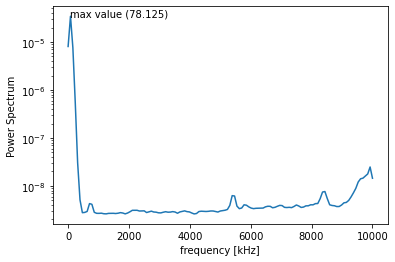


Velocity:  1.428922968
Max Frequency value:  156.25


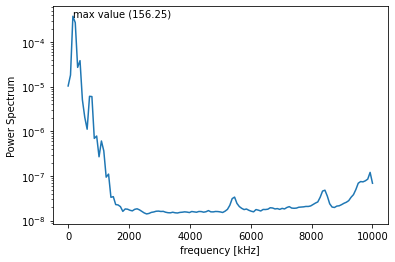


Velocity:  2.472287676
Max Frequency value:  312.5


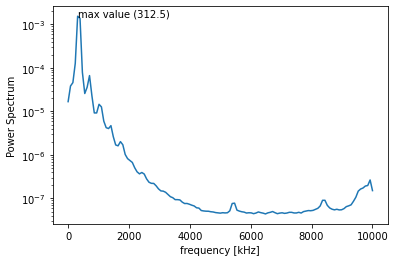


Velocity:  3.5336013040000003
Max Frequency value:  546.875


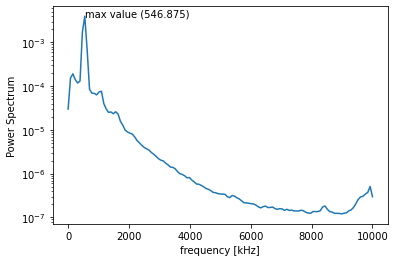


Velocity:  4.497844768
Max Frequency value:  703.125


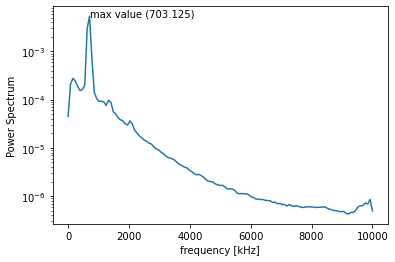


Velocity:  5.485490532
Max Frequency value:  859.375


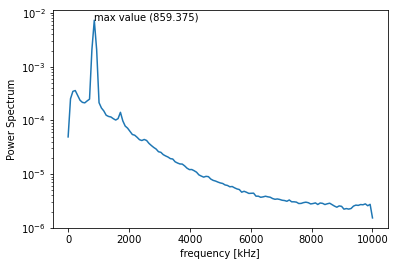


Velocity:  6.53581152
Max Frequency value:  1015.625


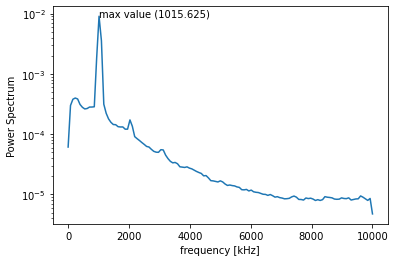


Velocity:  7.4573983880000005
Max Frequency value:  1171.875


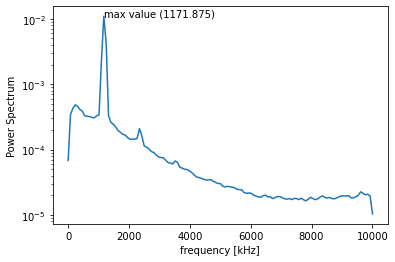


Velocity:  8.491591112
Max Frequency value:  1328.125


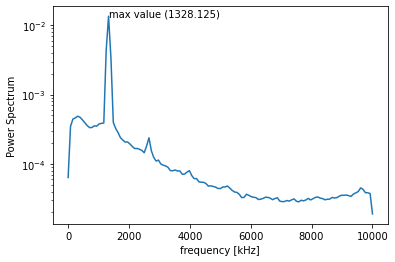


Velocity:  9.444944992
Max Frequency value:  1484.375


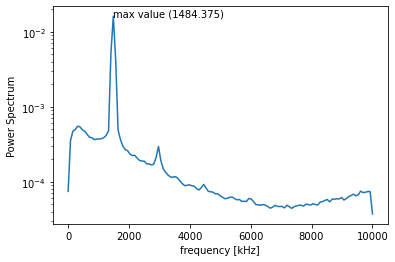


Velocity:  10.511900936
Max Frequency value:  1640.625


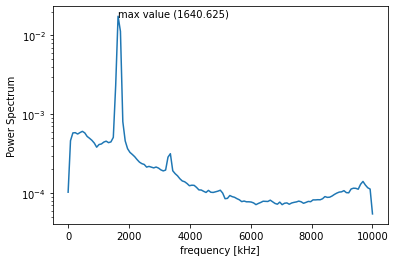


Velocity:  11.464885532
Max Frequency value:  1796.875


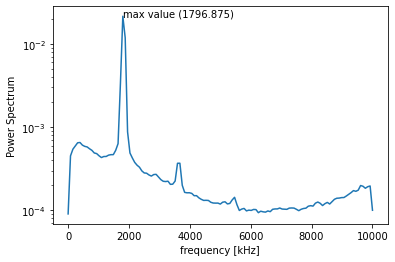


Velocity:  12.451827080000001
Max Frequency value:  1953.125


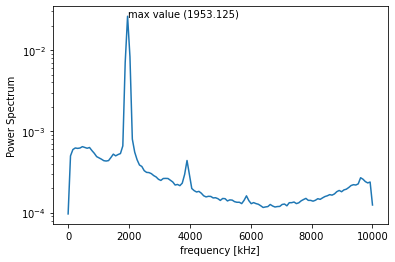


Velocity:  13.478848824
Max Frequency value:  2109.375


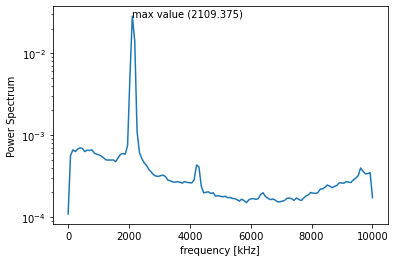


Velocity:  14.547831536
Max Frequency value:  2265.625


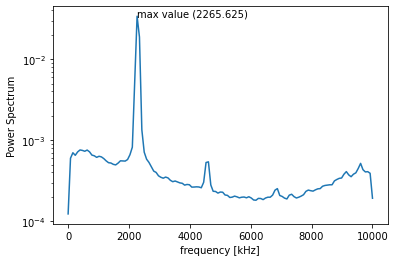


Velocity:  15.442486436000001
Max Frequency value:  2421.875


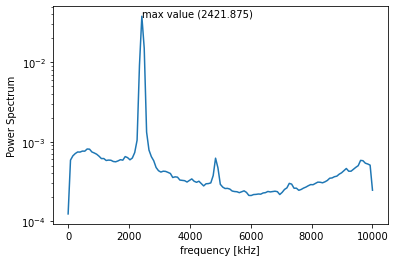

In [8]:
df = pd.read_csv(path_mat + dstream[-1], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 0*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

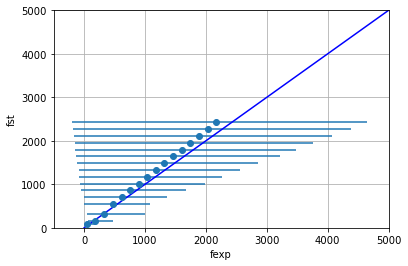

In [9]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')



## y-1

Velocity:  0.5976045680000001
Max Frequency value:  78.125


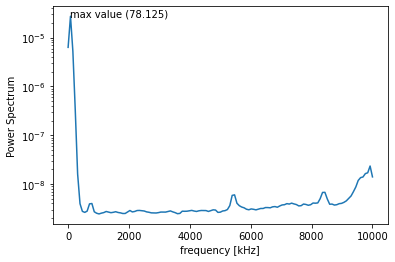


Velocity:  1.478784896
Max Frequency value:  156.25


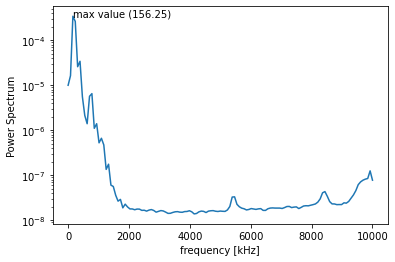


Velocity:  2.511869768
Max Frequency value:  390.625


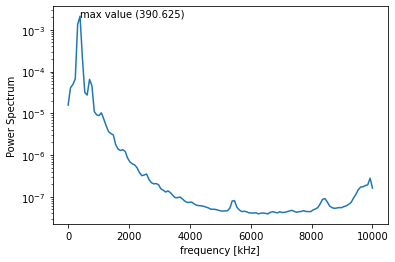


Velocity:  3.570254888
Max Frequency value:  546.875


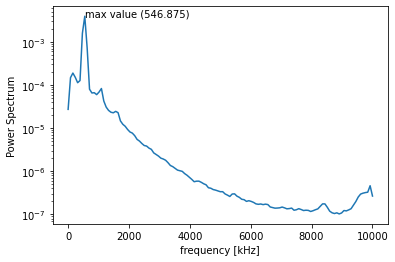


Velocity:  4.5015461960000005
Max Frequency value:  703.125


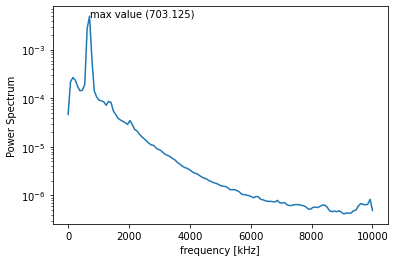


Velocity:  5.543425180000001
Max Frequency value:  859.375


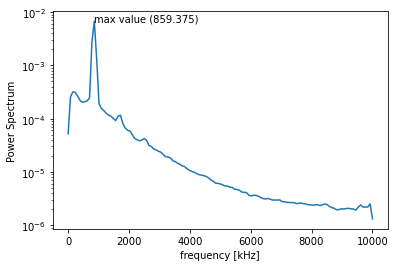


Velocity:  6.559711924
Max Frequency value:  1015.625


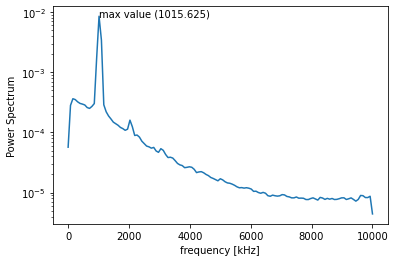


Velocity:  7.468863368000001
Max Frequency value:  1171.875


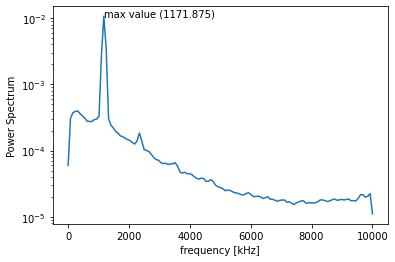


Velocity:  8.547112532
Max Frequency value:  1328.125


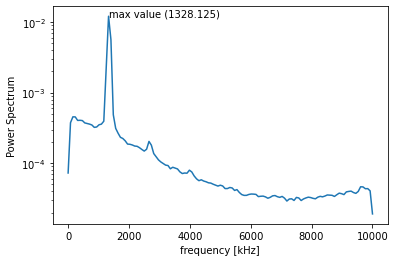


Velocity:  9.48682008
Max Frequency value:  1484.375


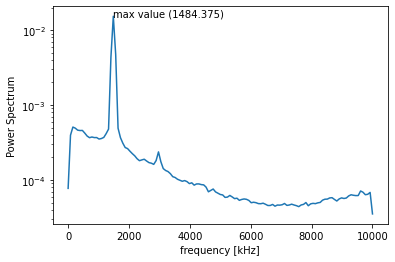


Velocity:  10.438911524
Max Frequency value:  1640.625


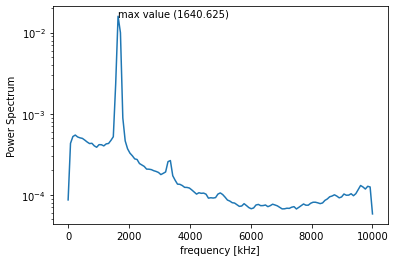


Velocity:  11.5083494
Max Frequency value:  1796.875


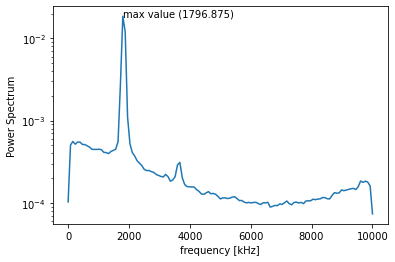


Velocity:  12.466392328000001
Max Frequency value:  1953.125


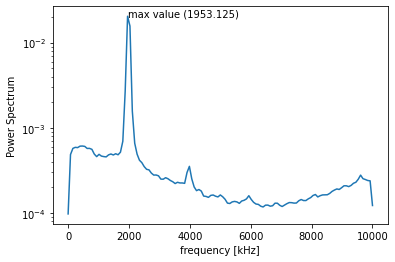


Velocity:  13.520543563999999
Max Frequency value:  2109.375


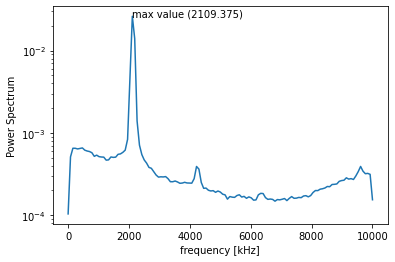


Velocity:  14.503998383999997
Max Frequency value:  2265.625


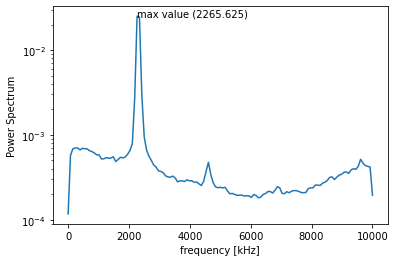


Velocity:  15.411183176
Max Frequency value:  2421.875


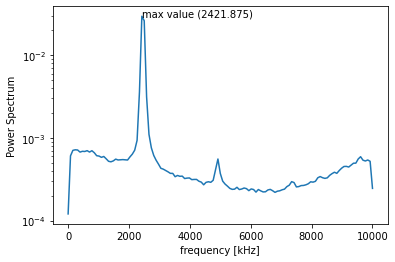

In [10]:
df1 = pd.read_csv(path_mat + dstream[-2], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 1*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df1[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

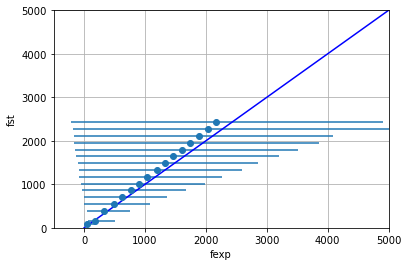

In [11]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

### Y0

Velocity:  0.5748034280000001
Max Frequency value:  78.125


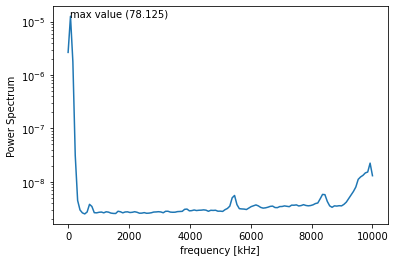


Velocity:  1.48349112
Max Frequency value:  156.25


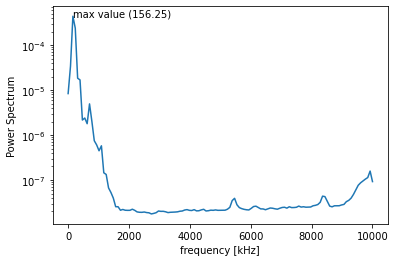


Velocity:  2.4786256200000003
Max Frequency value:  390.625


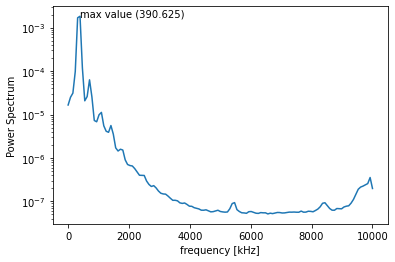


Velocity:  3.535817008
Max Frequency value:  546.875


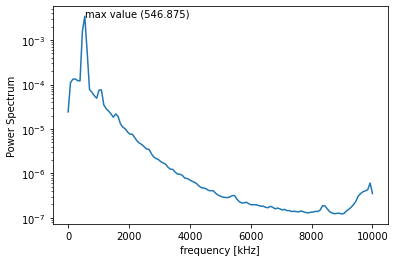


Velocity:  4.474536936
Max Frequency value:  703.125


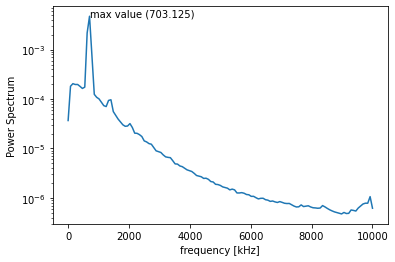


Velocity:  5.500734232
Max Frequency value:  859.375


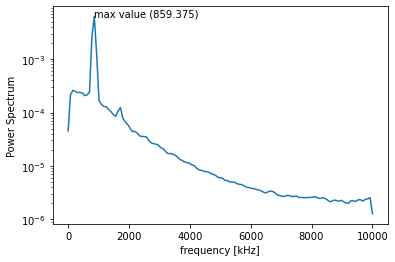


Velocity:  6.583629504
Max Frequency value:  1015.625


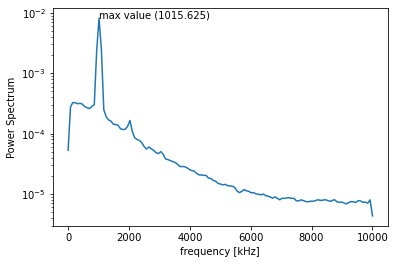


Velocity:  7.538735335999999
Max Frequency value:  1171.875


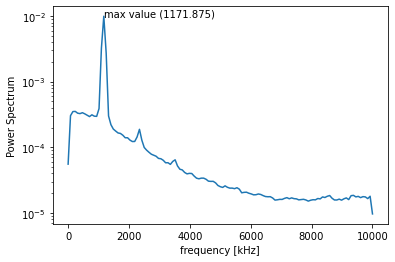


Velocity:  8.512331132
Max Frequency value:  1328.125


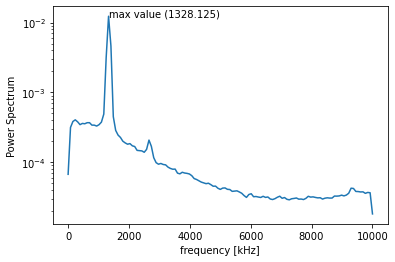


Velocity:  9.507010468
Max Frequency value:  1484.375


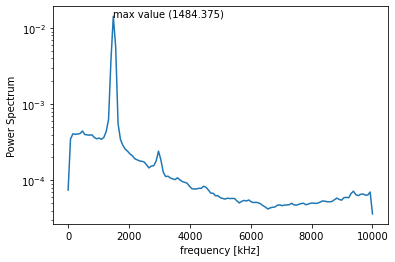


Velocity:  10.530030204000001
Max Frequency value:  1640.625


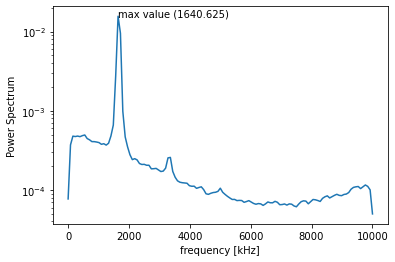


Velocity:  11.45033746
Max Frequency value:  1796.875


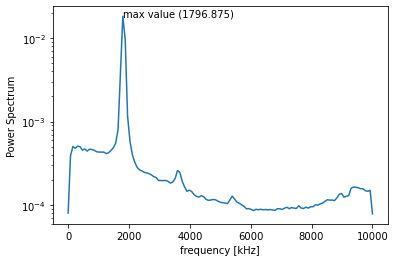


Velocity:  12.489021708000001
Max Frequency value:  1953.125


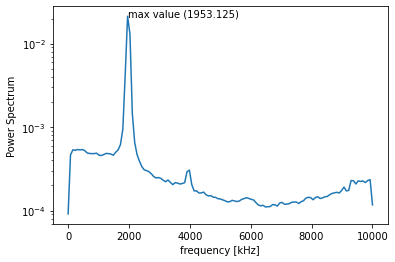


Velocity:  13.468311348
Max Frequency value:  2109.375


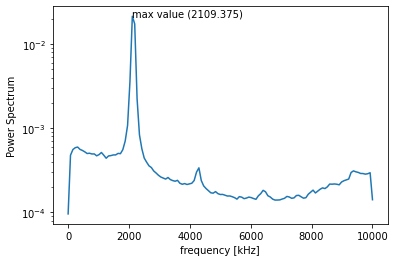


Velocity:  14.573449540000002
Max Frequency value:  2109.375


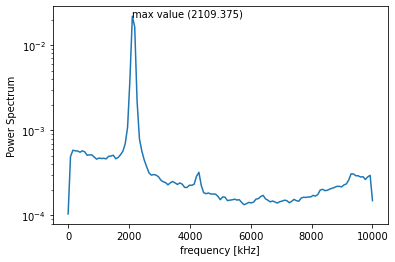


Velocity:  15.429441263999998
Max Frequency value:  2265.625


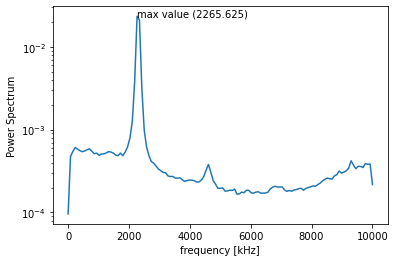

In [12]:
df2 = pd.read_csv(path_mat + dstream[1], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 2*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df2[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

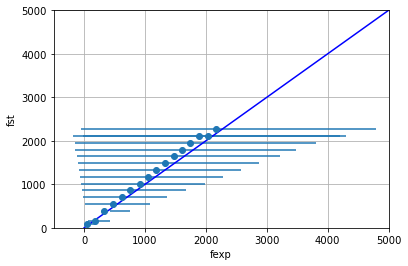

In [13]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

### Y1

Velocity:  0.5508858480000001
Max Frequency value:  78.125


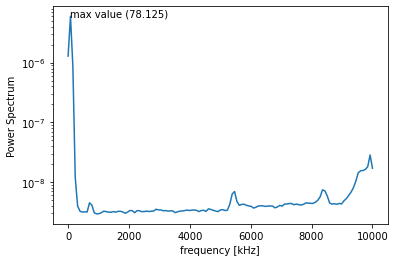


Velocity:  1.421983864
Max Frequency value:  156.25


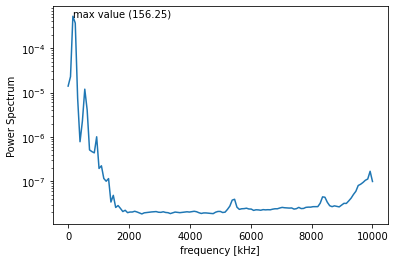


Velocity:  2.478127516
Max Frequency value:  390.625


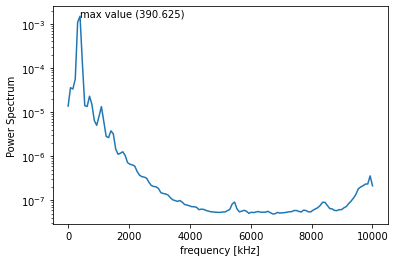


Velocity:  3.5352072600000004
Max Frequency value:  546.875


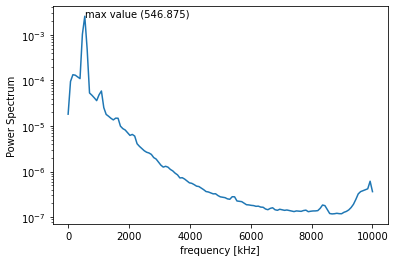


Velocity:  4.462316212
Max Frequency value:  703.125


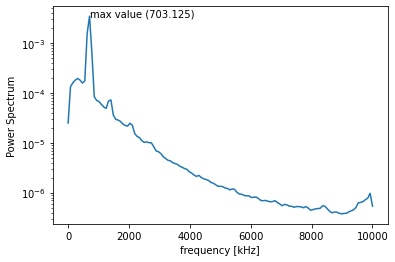


Velocity:  5.476163964
Max Frequency value:  859.375


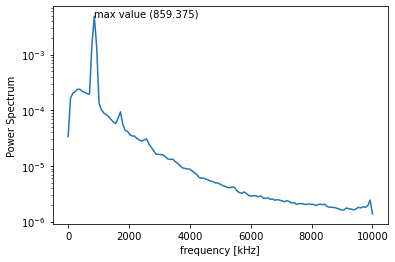


Velocity:  6.49480382
Max Frequency value:  1015.625


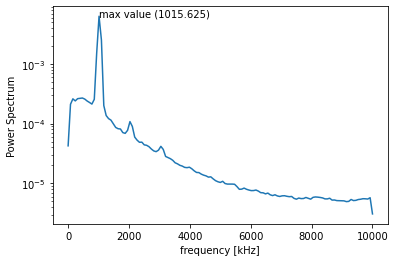


Velocity:  7.452975568000001
Max Frequency value:  1171.875


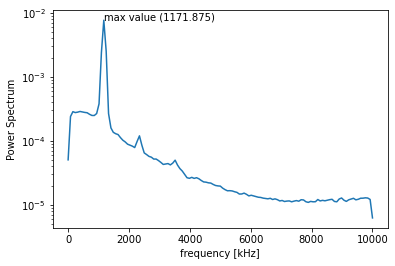


Velocity:  8.477721491999999
Max Frequency value:  1328.125


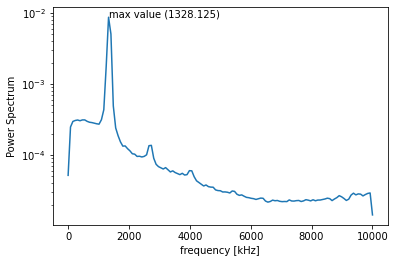


Velocity:  9.484286619999999
Max Frequency value:  1484.375


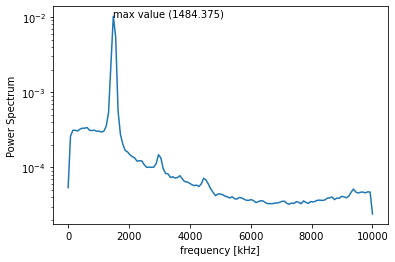


Velocity:  10.488206644
Max Frequency value:  1640.625


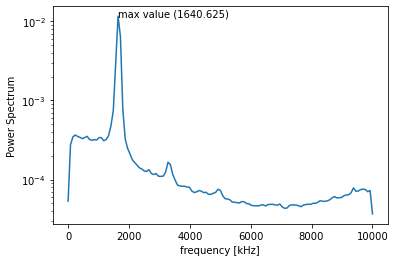


Velocity:  11.562943316000002
Max Frequency value:  1796.875


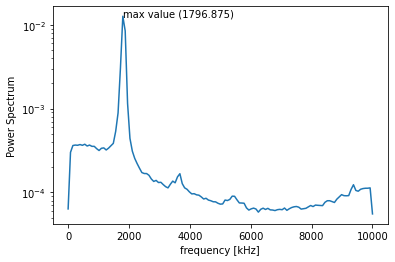


Velocity:  12.482649411999999
Max Frequency value:  1953.125


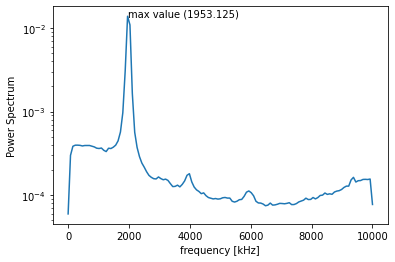


Velocity:  13.438562516000001
Max Frequency value:  2109.375


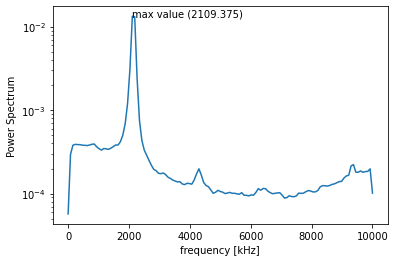


Velocity:  14.545521364
Max Frequency value:  2265.625


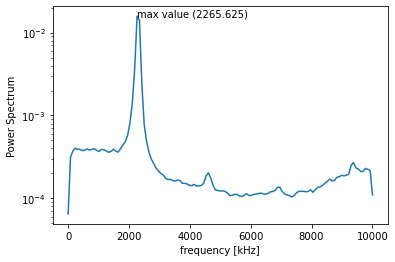


Velocity:  15.497363756000002
Max Frequency value:  2421.875


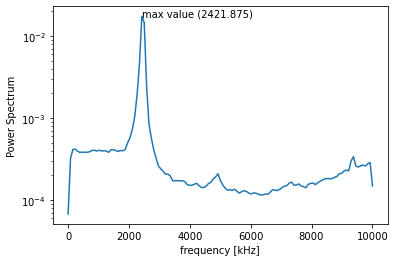

In [14]:
df3 = pd.read_csv(path_mat + dstream[2], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 3*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df3[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

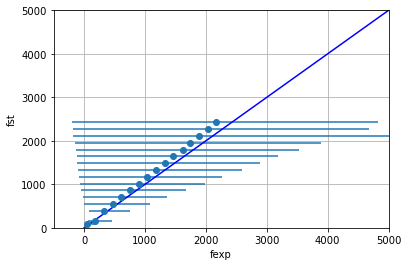

In [15]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y2

Velocity:  0.591034748
Max Frequency value:  78.125


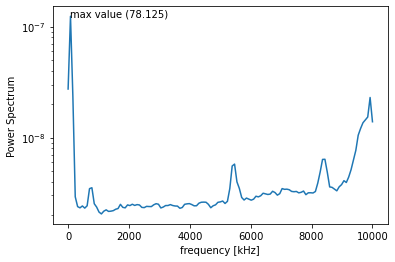


Velocity:  1.50272824
Max Frequency value:  156.25


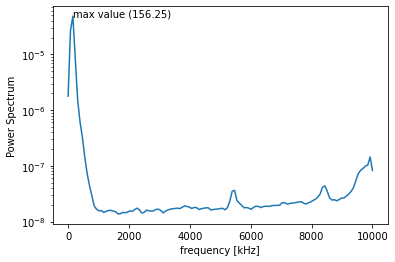


Velocity:  2.524245076
Max Frequency value:  312.5


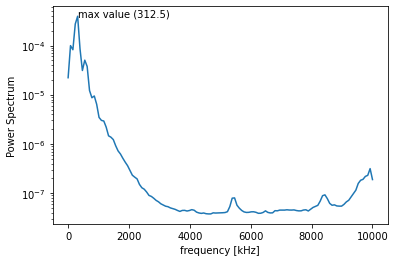


Velocity:  3.503783768
Max Frequency value:  390.625


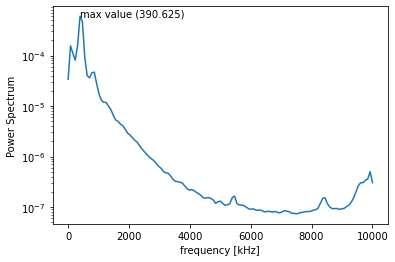


Velocity:  4.468413692
Max Frequency value:  546.875


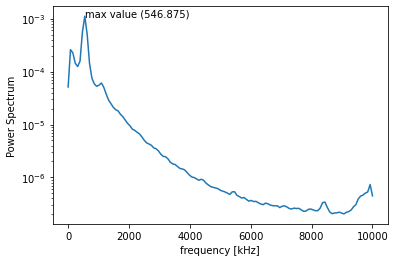


Velocity:  5.485894168
Max Frequency value:  703.125


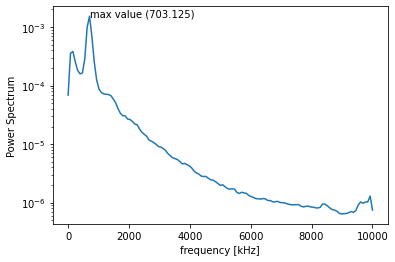


Velocity:  6.519494320000001
Max Frequency value:  859.375


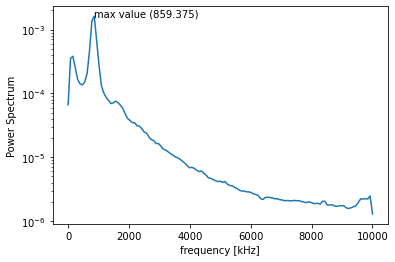


Velocity:  7.472607736
Max Frequency value:  937.5


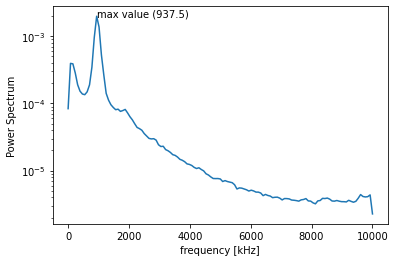


Velocity:  8.489770455999999
Max Frequency value:  1093.75


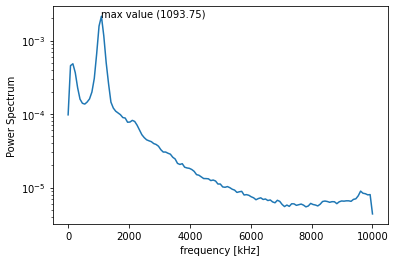


Velocity:  9.44675706
Max Frequency value:  1171.875


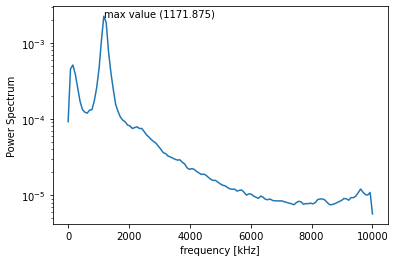


Velocity:  10.48478862
Max Frequency value:  1328.125


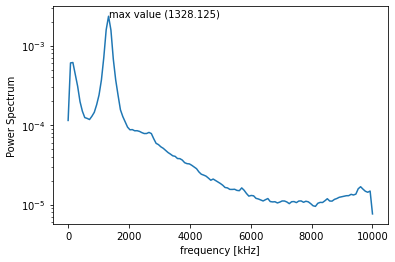


Velocity:  11.540374052
Max Frequency value:  1406.25


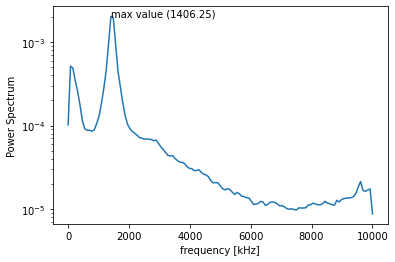


Velocity:  12.425341688000001
Max Frequency value:  1562.5


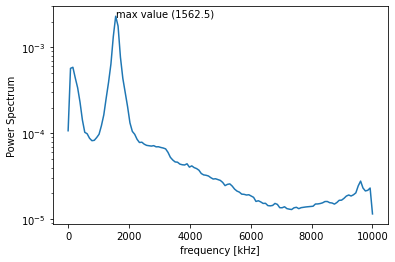


Velocity:  13.517907048000001
Max Frequency value:  1718.75


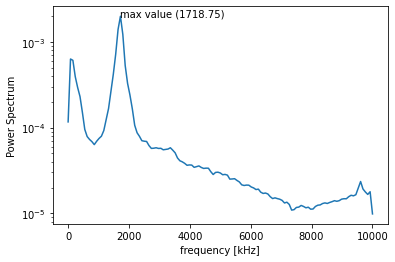


Velocity:  14.533884623999999
Max Frequency value:  1796.875


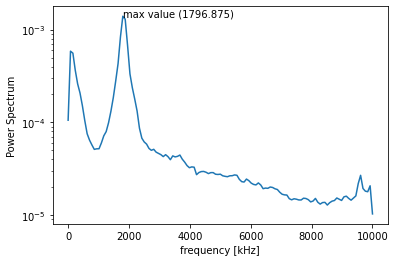


Velocity:  15.457618492
Max Frequency value:  1953.125


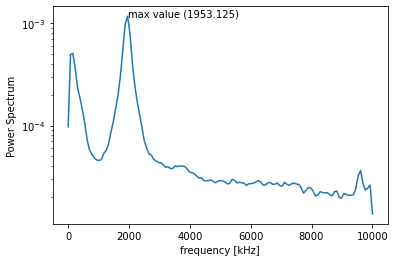

In [16]:
df4 = pd.read_csv(path_mat + dstream[3], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 4*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df4[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

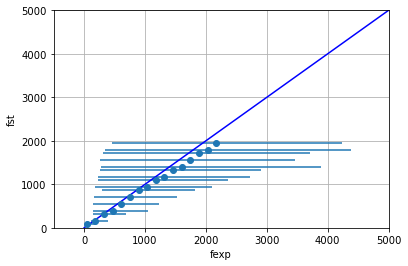

In [17]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y3

Velocity:  0.6268123560000001
Max Frequency value:  78.125


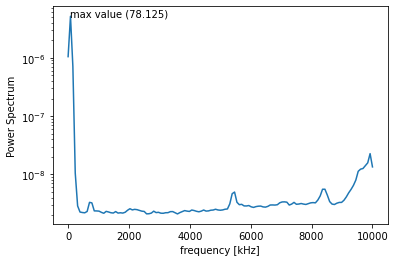


Velocity:  1.5012253400000002
Max Frequency value:  156.25


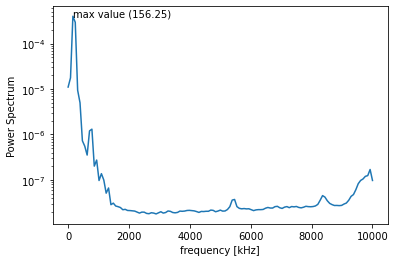


Velocity:  2.547698904
Max Frequency value:  390.625


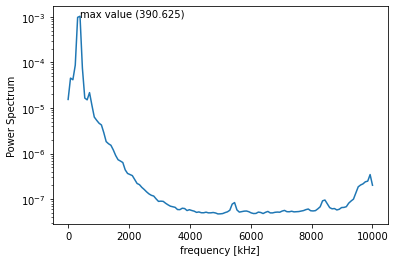


Velocity:  3.513891844
Max Frequency value:  546.875


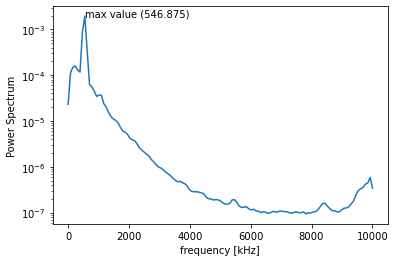


Velocity:  4.434465328
Max Frequency value:  703.125


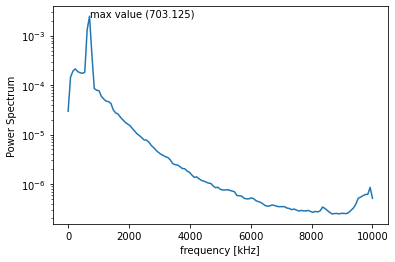


Velocity:  5.473707796
Max Frequency value:  859.375


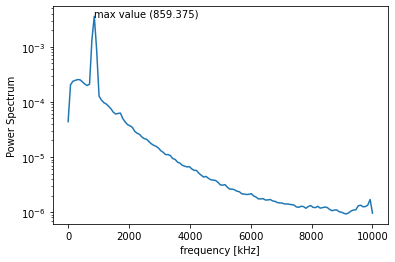


Velocity:  6.551544735999999
Max Frequency value:  1015.625


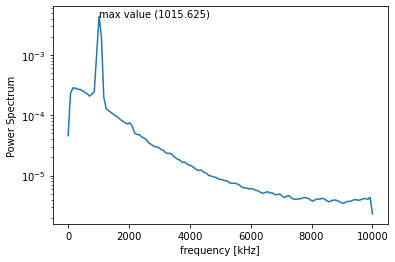


Velocity:  7.499325004000001
Max Frequency value:  1171.875


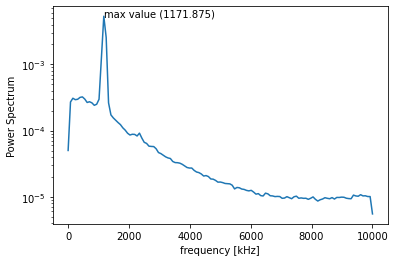


Velocity:  8.47708598
Max Frequency value:  1328.125


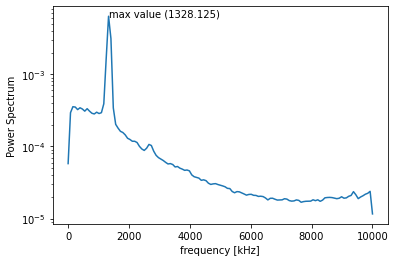


Velocity:  9.459286952000001
Max Frequency value:  1484.375


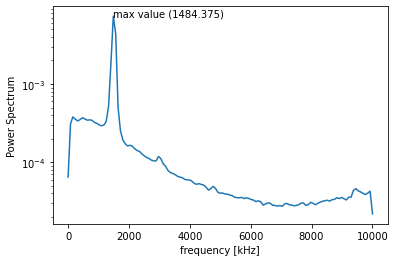


Velocity:  10.486102584000001
Max Frequency value:  1640.625


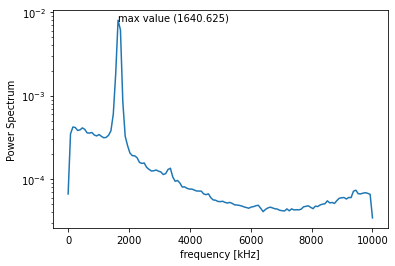


Velocity:  11.526014916000001
Max Frequency value:  1796.875


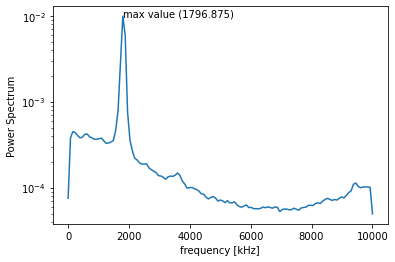


Velocity:  12.425041108
Max Frequency value:  1953.125


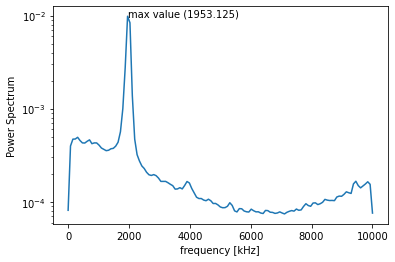


Velocity:  13.574759608
Max Frequency value:  2109.375


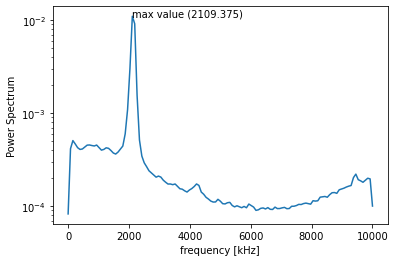


Velocity:  14.471235164
Max Frequency value:  2343.75


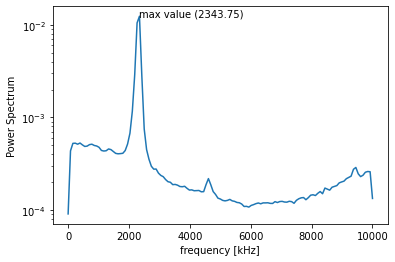


Velocity:  15.555478751999999
Max Frequency value:  2421.875


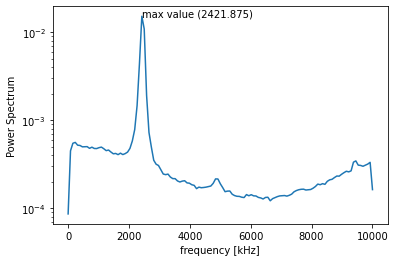

In [18]:
df5 = pd.read_csv(path_mat + dstream[4], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 5*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df5[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    else:
        Fst.append(1000)
        
    counter += 1

Text(0, 0.5, 'fst')

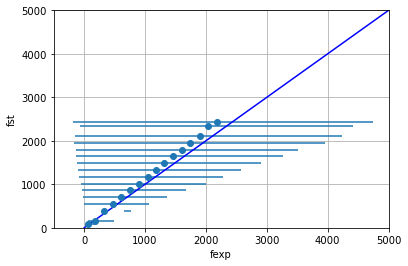

In [19]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y4

Velocity:  0.57526718
Max Frequency value:  78.125


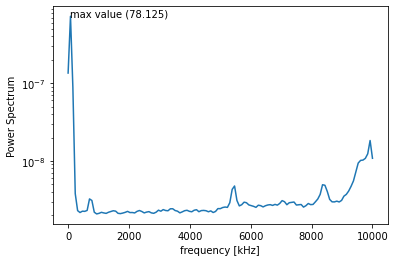


Velocity:  1.4812668279999999
Max Frequency value:  156.25


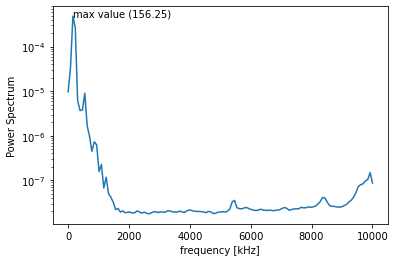


Velocity:  2.55218184
Max Frequency value:  312.5


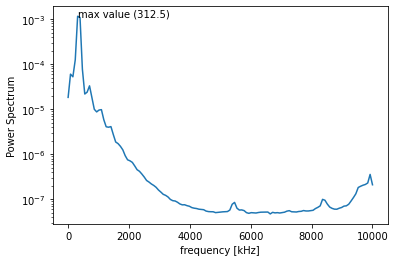


Velocity:  3.5089108040000005
Max Frequency value:  546.875


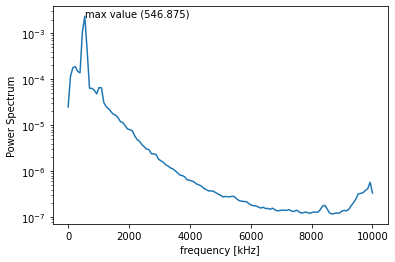


Velocity:  4.510786884000001
Max Frequency value:  703.125


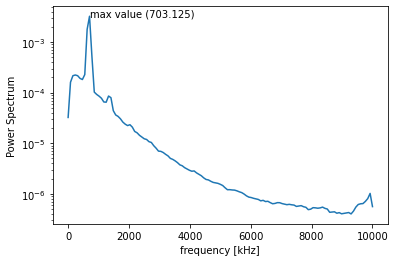


Velocity:  5.552683044
Max Frequency value:  859.375


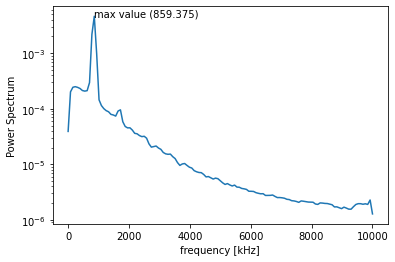


Velocity:  6.5499044280000005
Max Frequency value:  1015.625


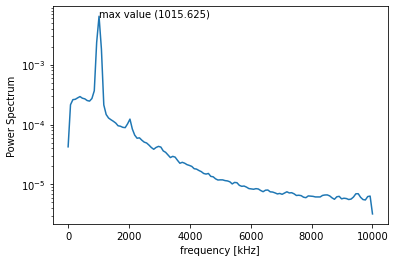


Velocity:  7.4677898680000006
Max Frequency value:  1171.875


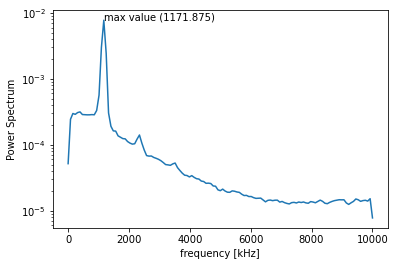


Velocity:  8.491908868000001
Max Frequency value:  1328.125


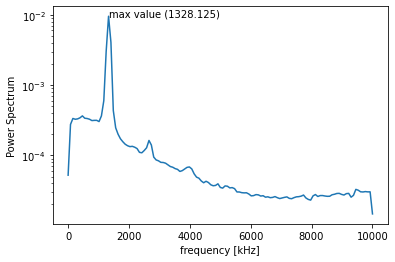


Velocity:  9.48183904
Max Frequency value:  1484.375


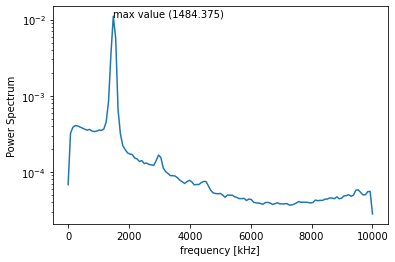


Velocity:  10.541838704000002
Max Frequency value:  1640.625


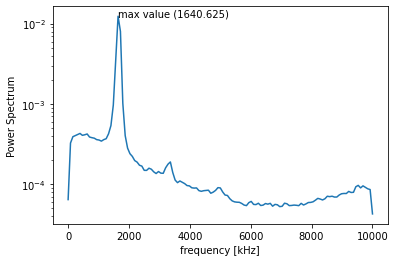


Velocity:  11.454863336
Max Frequency value:  1796.875


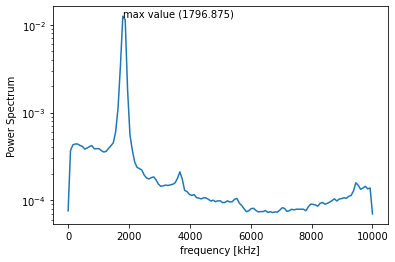


Velocity:  12.404661784
Max Frequency value:  1953.125


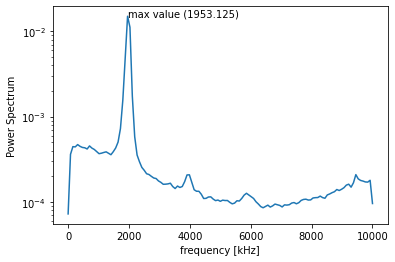


Velocity:  13.543138592
Max Frequency value:  2109.375


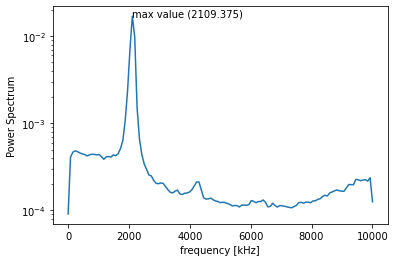


Velocity:  14.534107912
Max Frequency value:  2265.625


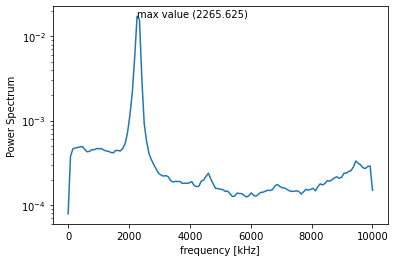


Velocity:  15.501520348
Max Frequency value:  2421.875


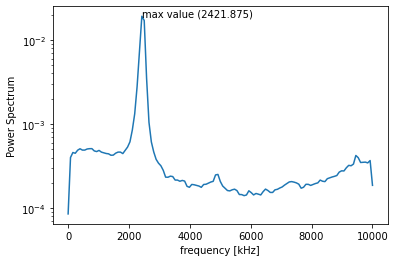

In [20]:
df6 = pd.read_csv(path_mat + dstream[5], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 6*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df6[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

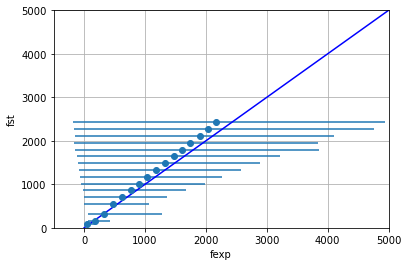

In [21]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y5

Velocity:  0.618215768
Max Frequency value:  78.125


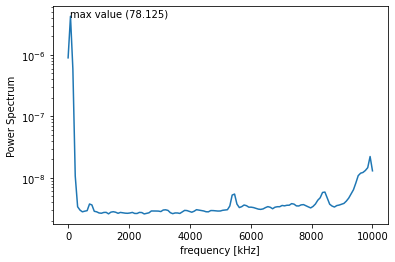


Velocity:  1.498837876
Max Frequency value:  156.25


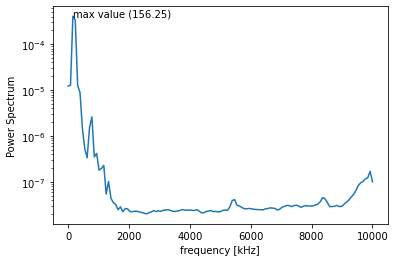


Velocity:  2.461887608
Max Frequency value:  390.625


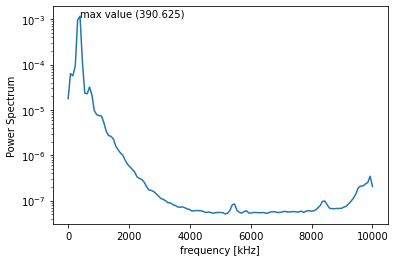


Velocity:  3.5359114759999994
Max Frequency value:  546.875


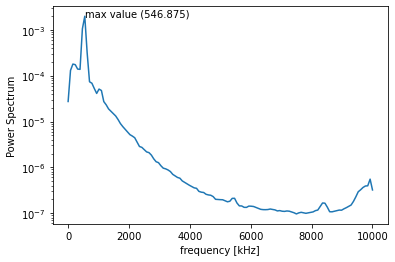


Velocity:  4.445818664
Max Frequency value:  703.125


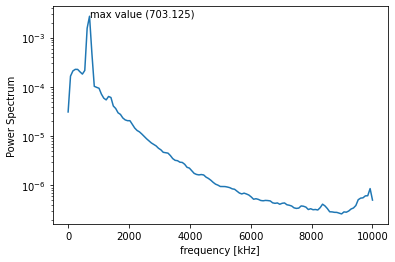


Velocity:  5.522616456
Max Frequency value:  859.375


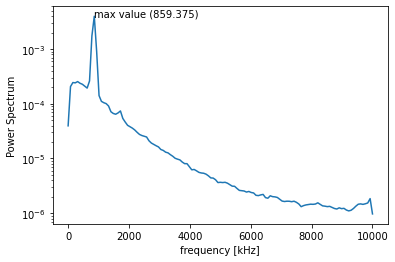


Velocity:  6.576492876
Max Frequency value:  1015.625


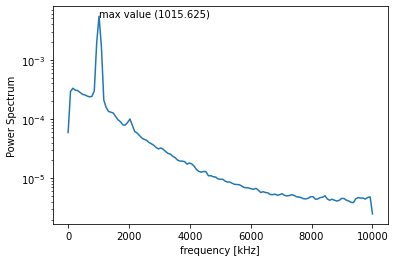


Velocity:  7.506581864000001
Max Frequency value:  1171.875


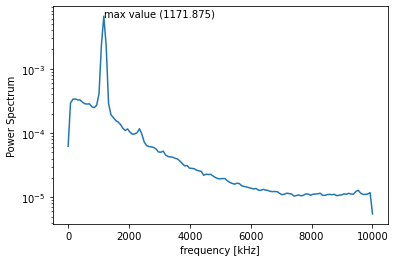


Velocity:  8.53814666
Max Frequency value:  1328.125


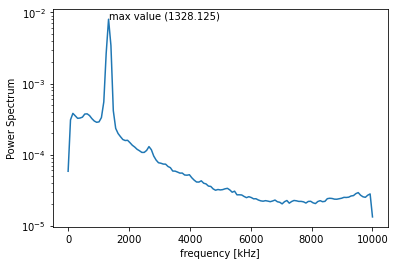


Velocity:  9.49021234
Max Frequency value:  1484.375


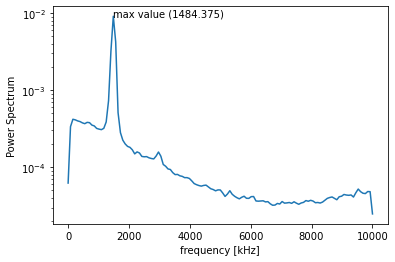


Velocity:  10.429593544
Max Frequency value:  1640.625


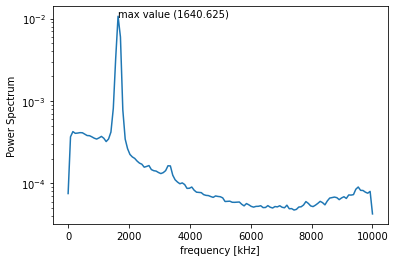


Velocity:  11.563965288
Max Frequency value:  1796.875


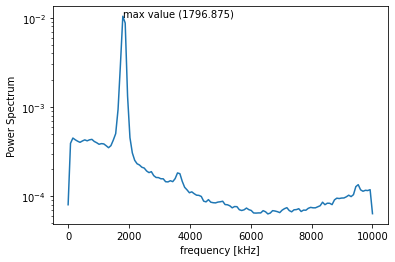


Velocity:  12.468367568000001
Max Frequency value:  1953.125


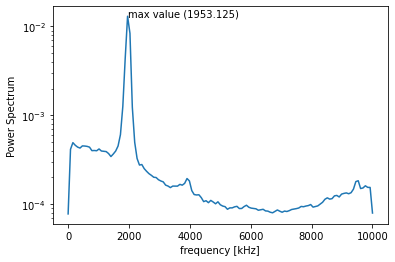


Velocity:  13.53692088
Max Frequency value:  2109.375


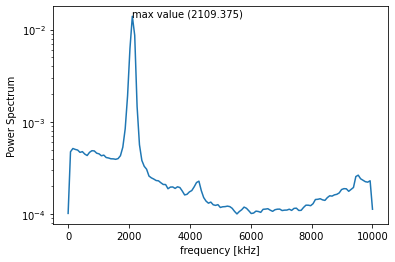


Velocity:  14.570838788
Max Frequency value:  2343.75


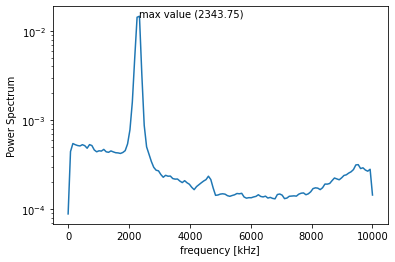


Velocity:  15.514900452
Max Frequency value:  2421.875


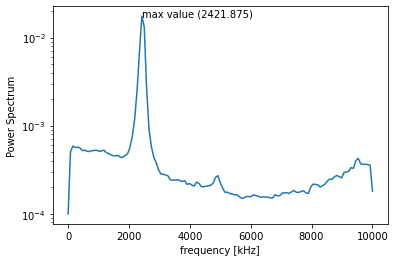

In [22]:
df7 = pd.read_csv(path_mat + dstream[6], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 7*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df7[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

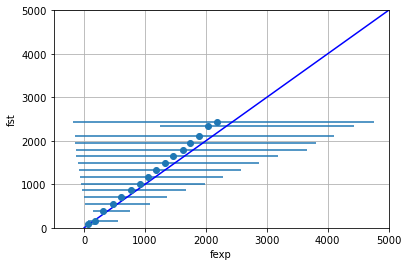

In [23]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y6

Velocity:  0.634455676
Max Frequency value:  78.125


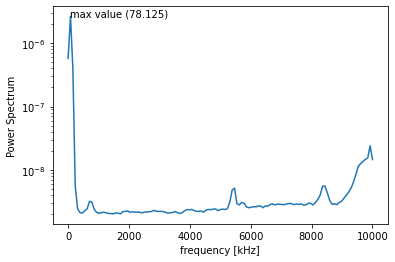


Velocity:  1.50822456
Max Frequency value:  156.25


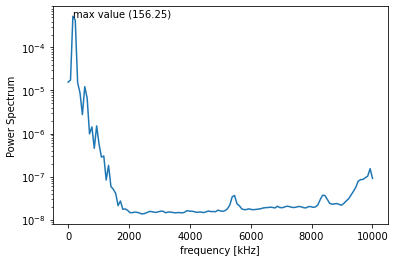


Velocity:  2.5520358439999997
Max Frequency value:  390.625


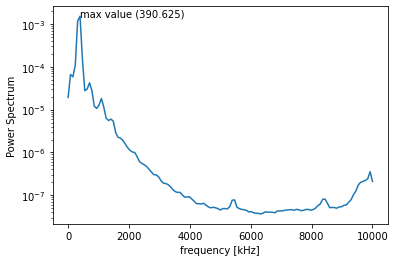


Velocity:  3.516159076
Max Frequency value:  546.875


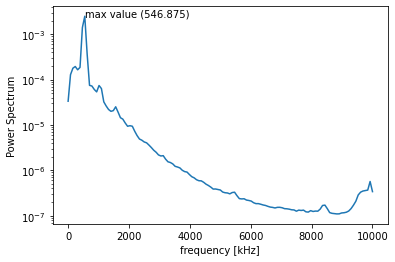


Velocity:  4.503993776
Max Frequency value:  703.125


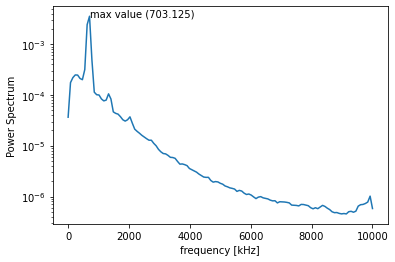


Velocity:  5.529332272
Max Frequency value:  859.375


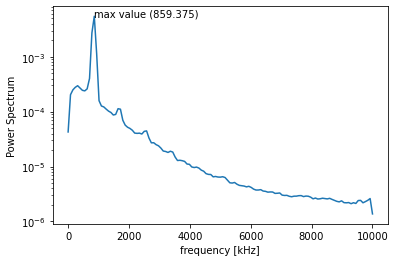


Velocity:  6.567003135999999
Max Frequency value:  1015.625


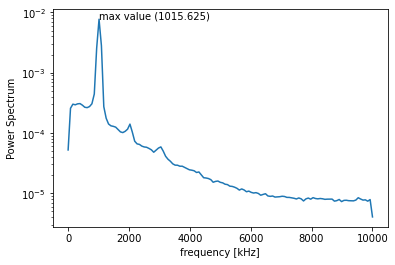


Velocity:  7.527347648
Max Frequency value:  1171.875


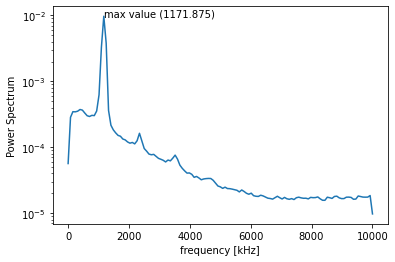


Velocity:  8.47283492
Max Frequency value:  1328.125


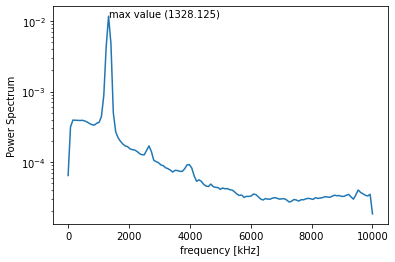


Velocity:  9.49991678
Max Frequency value:  1484.375


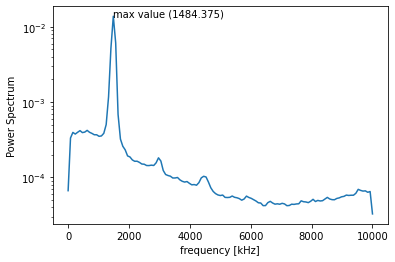


Velocity:  10.500186904
Max Frequency value:  1640.625


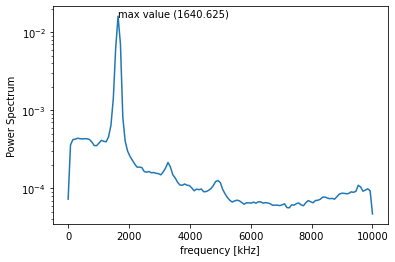


Velocity:  11.522871708
Max Frequency value:  1796.875


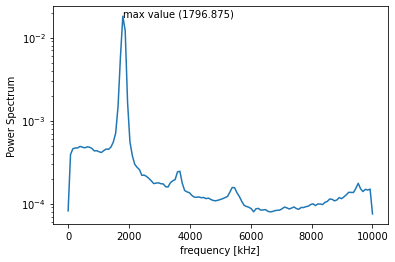


Velocity:  12.496218451999999
Max Frequency value:  1953.125


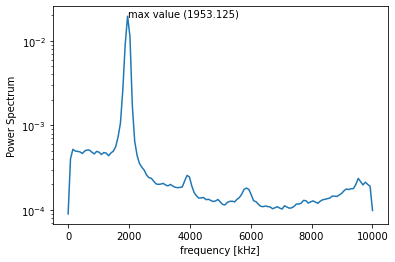


Velocity:  13.499880836
Max Frequency value:  2109.375


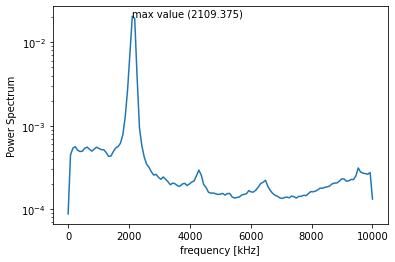


Velocity:  14.487457896000002
Max Frequency value:  2265.625


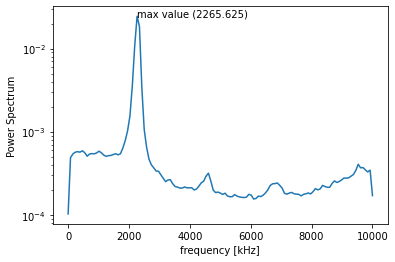


Velocity:  15.44088048
Max Frequency value:  2421.875


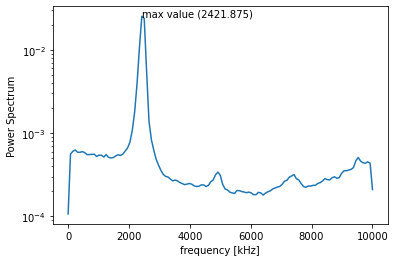

In [24]:
df8 = pd.read_csv(path_mat + dstream[7], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 8*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df8[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

Text(0, 0.5, 'fst')

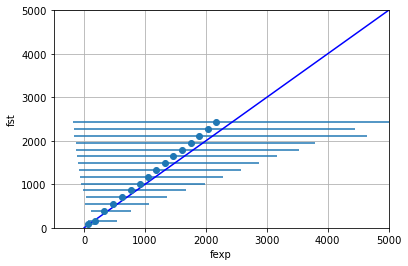

In [25]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y7

In [26]:
df9 = pd.read_csv(path_mat + dstream[8], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 9*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df9[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

ParserError: Too many columns specified: expected 10 and found 1

In [ ]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y8

In [ ]:
df10 = pd.read_csv(path_mat + dstream[9], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 10*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df10[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

In [ ]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y9

In [ ]:
df11 = pd.read_csv(path_mat + dstream[10], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 11*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df11[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

In [ ]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y10

In [ ]:
df12 = pd.read_csv(path_mat + dstream[11], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 12*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df12[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

In [ ]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

#### Velocidades UpStream

In [ ]:
velocity = pd.read_csv(path_mat + ustream[0])
velocity.head()

In [ ]:
vel = pd.DataFrame(velocity.iloc[:,8]*0.8588)
vel.describe()

In [ ]:
df_prueba = pd.read_csv(path_mat + ustream[1])
df_prueba.describe()

## Graficas Upstream

## y-2

In [ ]:
df = pd.read_csv(path_mat + ustream[-1], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 0*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

In [ ]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')



## y-1

In [ ]:
df1 = pd.read_csv(path_mat + ustream[-2], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 1*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df1[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

In [ ]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

### Y0

In [ ]:
df2 = pd.read_csv(path_mat + ustream[1], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 2*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df2[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

In [ ]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

### Y1

In [ ]:
df3 = pd.read_csv(path_mat + ustream[2], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 3*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df3[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

In [ ]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y2

In [ ]:
df4 = pd.read_csv(path_mat + ustream[3], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 4*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df4[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

In [ ]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y3

In [ ]:
df5 = pd.read_csv(path_mat + ustream[4], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 5*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df5[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    else:
        Fst.append(1000)
        
    counter += 1

In [ ]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y4

In [ ]:
df6 = pd.read_csv(path_mat + ustream[5], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 6*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df6[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

In [ ]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y5

In [ ]:
df7 = pd.read_csv(path_mat + ustream[6], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 7*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df7[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

In [ ]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y6

In [ ]:
df8 = pd.read_csv(path_mat + ustream[7], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 8*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df8[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

In [ ]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y7

In [ ]:
df9 = pd.read_csv(path_mat + ustream[8], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 9*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df9[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

In [ ]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y8

In [ ]:
df10 = pd.read_csv(path_mat + ustream[9], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 10*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df10[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

In [ ]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y9

In [ ]:
df11 = pd.read_csv(path_mat + ustream[10], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 11*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df11[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

In [ ]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')

## Y10

In [ ]:
df12 = pd.read_csv(path_mat + ustream[11], header=None)

#Propiedades
d = 0.0015
vis = 0.0000151
counter = 12*16
Fst = []
fexp = []

errors1x = []
errors1y = []

errors2x = []
errors2y = []

for i in range(0,1600000,100000):
    try:
        fs = 20000
        f, Pxx_spec = signal.welch(df12[0].iloc[i:i+100000], fs, nperseg=256)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        plt.semilogy(f, Pxx_spec)

        y = np.amax(Pxx_spec)
        x1 = 0
        
        for vv in range(len(Pxx_spec)):
            if Pxx_spec[vv] == y:
                x1 = vv 
        
        x = f[x1]
        print('Velocity: ',float(vel.iloc[counter]))
        print('Max Frequency value: ',x)
        
        fexp.append(x)
        
        plt.xlabel('frequency [kHz]')
        plt.ylabel('Power Spectrum')
        plt.text(x,y,'max value ('+str(x)+')')
        
        #plt.grid()
        plt.show()
        
        errors1x.append((f[x1-1],f[x1]))
        errors1y.append((Pxx_spec[x1-1],y))
        
        errors2x.append((f[x1],f[x1+1]))
        errors2y.append((y,Pxx_spec[x1+1]))
        
    except:
        pass
    
    re = d*float(vel.iloc[counter])/vis
    print()
    
    if re <=300:
        st = 0.212-4.5/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
    
    elif re >300:
        st = 0.212-2.7/re
        fst = st*float(vel.iloc[counter])/d
        #print(fst)
        Fst.append(fst)
        
    counter += 1

In [ ]:
bar1 = []
bar2 = []

counter = 0
for i in range(len(errors1y)):
    y_f1 = interp1d(errors1y[i],errors1x[i], 'linear', fill_value="extrapolate")
    y_ev1 = errors1y[i][1]/2
    bar1.append(y_f1(y_ev1).astype(float))
        
    y_f2 = interp1d(errors2y[i],errors2x[i], 'linear', fill_value="extrapolate")
    y_ev2 = errors2y[i][0]/2
    bar2.append(y_f2(y_ev2).astype(float))

x_1 = []
for i in range(len(bar1)):
    x_1.append(float(bar1[i]))
    
x_2 = []
for i in range(len(bar2)):
    x_2.append(float(bar2[i]))


asymmetric_error=[x_1, x_2]

x = [0, 1000, 2000, 3000, 4000, 5000]
y = x
plt.plot(x, y, '-b')
plt.errorbar(Fst,fexp, xerr=asymmetric_error, fmt='o')
plt.grid()

plt.xlim(-500, 5000)
plt.ylim(0, 5000)

plt.xlabel('fexp')
plt.ylabel('fst')